In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# 1. Data Exploration

In [2]:
df = pd.read_csv("input\R-ICERSC.csv")
df.head(3)

,PAR_Total,Label,Recycle,EQP_ID1,EQP_ID2,EQP_ID3,RECIPE_ID3,EQP_ID4,MAINPD_ID_1,MAINPD_ID_2
0,112,G,0,KIN4,GMR7,GSP,DCLN2,KP20,R1,R9
1,104,G,0,KIN4,GMR7,GSP,DCLN2,KP20,R1,R9
2,166,G,0,KIN4,GMR7,GSP,DCLN2,KP20,R1,R9


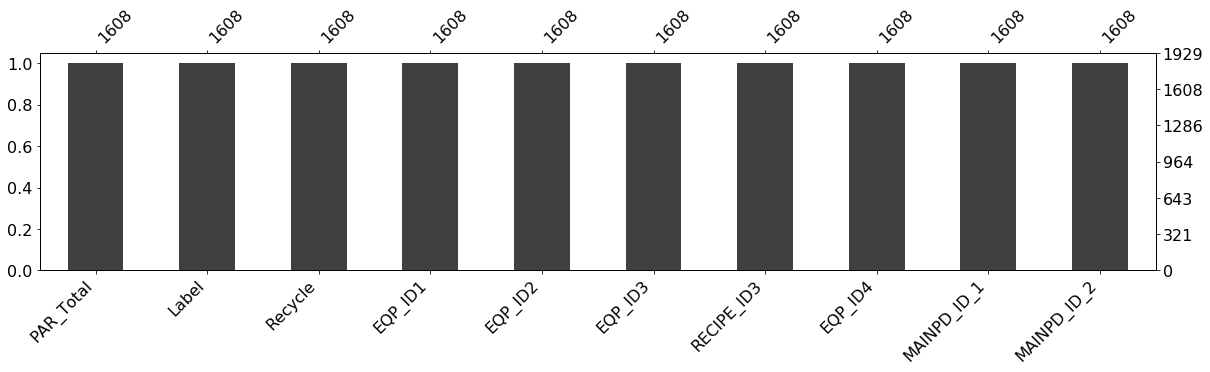

In [3]:
# Missing data review
import missingno as msno
msno.bar(df,figsize=(20,4))

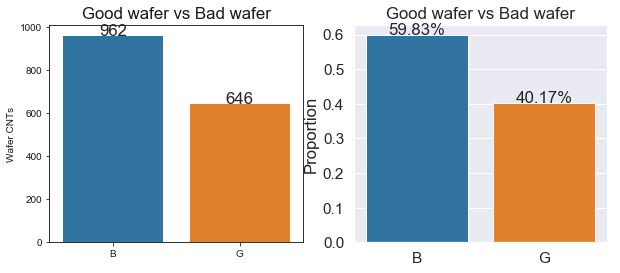

In [4]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
pal = sns.color_palette()
sns.set(font_scale=1.4)
sumb = (df.Label == 'B').sum()
sumg = (df.Label == 'G').sum()
ax = sns.barplot(x=['B','G'],y=df.groupby(['Label'],as_index=False).count()['EQP_ID1'], palette=pal)
ax.set(ylabel='Wafer CNTs', title='Good wafer vs Bad wafer')
for p, uniq in zip(ax.patches, [sumb, sumg]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.001,
            '{}'.format(round(uniq, 0)),
            ha="center")

plt.subplot(1,2,2)
sns.set(font_scale=1.4)
mean = (df.Label == 'B').mean()
ax = sns.barplot(['B', 'G'], [mean, 1-mean], palette=pal)
ax.set(ylabel='Proportion', title='Good wafer vs Bad wafer')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.001,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center")

In [5]:
df.describe()

,PAR_Total,Recycle
count,1608.000000,1608.000000
mean,8094.031095,0.378109
std,15348.414295,0.773756
min,26.000000,0.000000
25%,178.750000,0.000000
50%,1878.500000,0.000000
75%,8869.500000,1.000000
max,194442.000000,11.000000


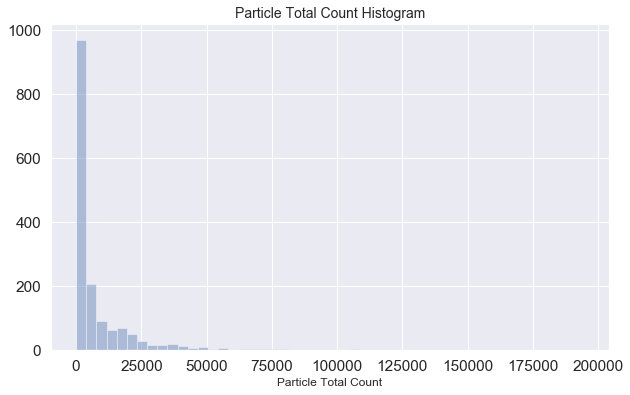

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(df["PAR_Total"].values, bins=50, kde=False)
plt.xlabel('Particle Total Count', fontsize=12)
plt.title("Particle Total Count Histogram", fontsize=14)
plt.show()

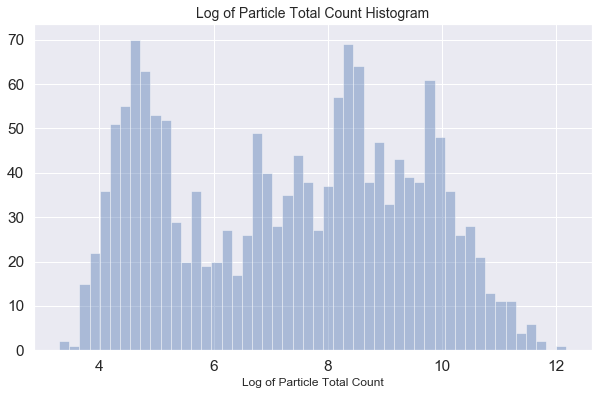

In [7]:
plt.figure(figsize=(10,6))
sns.distplot( np.log1p(df["PAR_Total"].values), bins=50, kde=False) ## log1p: log(1 + x)
plt.xlabel('Log of Particle Total Count', fontsize=12)
plt.title("Log of Particle Total Count Histogram", fontsize=14)
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 10 columns):
PAR_Total      1608 non-null int64
Label          1608 non-null object
Recycle        1608 non-null int64
EQP_ID1        1608 non-null object
EQP_ID2        1608 non-null object
EQP_ID3        1608 non-null object
RECIPE_ID3     1608 non-null object
EQP_ID4        1608 non-null object
MAINPD_ID_1    1608 non-null object
MAINPD_ID_2    1608 non-null object
dtypes: int64(2), object(8)
memory usage: 125.7+ KB


# 2. Data Preprocess
### One Hot Encoding

In [9]:
features = ['Recycle','EQP_ID1','EQP_ID2','EQP_ID3','RECIPE_ID3','EQP_ID4','MAINPD_ID_1','MAINPD_ID_2']
train_X = df[features]

In [10]:
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
LE2 = LabelEncoder()
LE3 = LabelEncoder()
LE4 = LabelEncoder()
LE5 = LabelEncoder()
LE6 = LabelEncoder()
LE7 = LabelEncoder()

train_X['EQP_ID1'] = LE2.fit_transform(train_X['EQP_ID1'])
train_X['EQP_ID2'] = LE3.fit_transform(train_X['EQP_ID2'])
train_X['EQP_ID3'] = LE3.fit_transform(train_X['EQP_ID3'])
train_X['RECIPE_ID3'] = LE3.fit_transform(train_X['RECIPE_ID3'])
train_X['EQP_ID4'] = LE3.fit_transform(train_X['EQP_ID4'])
train_X['MAINPD_ID_1'] = LE4.fit_transform(train_X['MAINPD_ID_1'])
train_X['MAINPD_ID_2'] = LE5.fit_transform(train_X['MAINPD_ID_2'])

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [11]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 8 columns):
Recycle        1608 non-null int64
EQP_ID1        1608 non-null int64
EQP_ID2        1608 non-null int64
EQP_ID3        1608 non-null int64
RECIPE_ID3     1608 non-null int64
EQP_ID4        1608 non-null int64
MAINPD_ID_1    1608 non-null int64
MAINPD_ID_2    1608 non-null int64
dtypes: int64(8)
memory usage: 100.6 KB


### Transfer target data to log value

In [12]:
train_y = np.log1p(df['PAR_Total'].values)

### Correlation for referrence

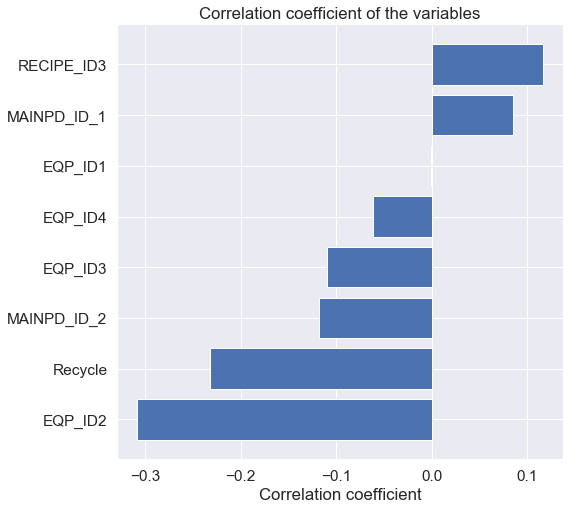

In [13]:
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings("ignore")

labels = []
values = []
for col in train_X.columns:
    if col not in ["PAR_Total"]:
        labels.append(col)
        values.append(spearmanr(train_X[col].values, train_y)[0])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(corr_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(8,8))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='b')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

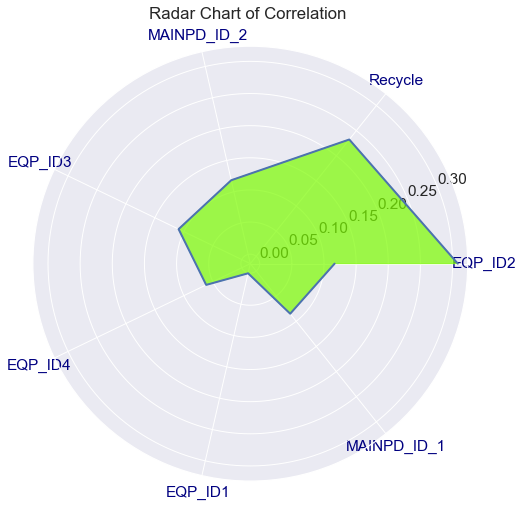

In [14]:
from math import pi 

N = len(corr_df)-1

corr_df2=corr_df.fillna(0)
values = np.abs(corr_df2['corr_values'])

angles = [n/float(N)*2*pi for n in range(N)]
angles += angles[:1]
angles

fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111,projection = "polar")

plt.xticks(angles[:-1],corr_df['col_labels'],color="navy")
plt.plot(angles,values,color="b",linewidth=2)
plt.fill(angles,values,color="lawngreen",alpha=.7)
plt.title("Radar Chart of Correlation ")
plt.show()

## Correlation Heat Map:
Now let us take these variables and do a correlation heat map.

This is just done to identify if there are any strong monotonic relationships between these important features. If the values are high, then probably we can choose to keep one of those variables in the model building process.

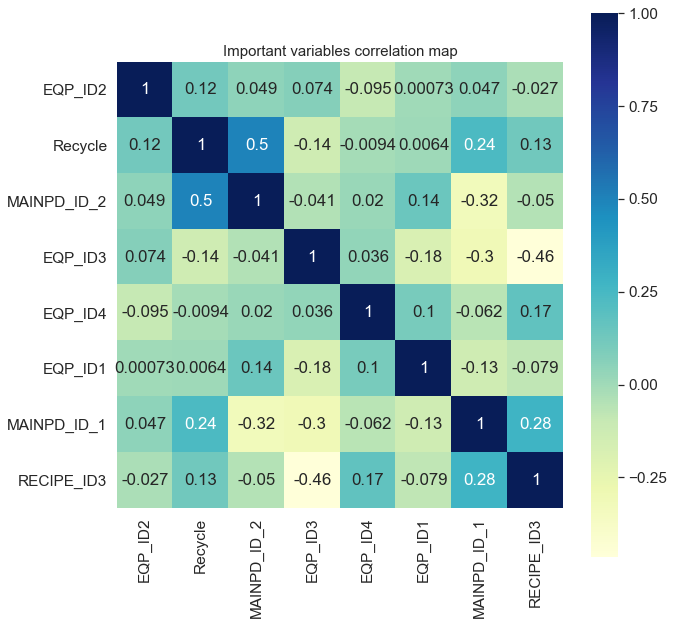

In [15]:
cols_to_use = corr_df[(corr_df['corr_values']>0) | (corr_df['corr_values']<-0)].col_labels.tolist()

temp_df = train_X[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True, cmap="YlGnBu", annot=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

# 4. Model Training
### 4.1 Light GBM (RMSE = 1.41)

In [16]:
import lightgbm as lgb
from Booster import run_lgb 
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017) # split 5 sets for cross validation
pred_test_full = 0
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index,:], train_X.loc[val_index,:]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y)

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.51293
[400]	valid_0's rmse: 1.47763
[600]	valid_0's rmse: 1.47704
Early stopping, best iteration is:
[530]	valid_0's rmse: 1.47607
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.6155
[400]	valid_0's rmse: 1.5747
[600]	valid_0's rmse: 1.56838
[800]	valid_0's rmse: 1.56355
[1000]	valid_0's rmse: 1.5622
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 1.5622
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.42132
[400]	valid_0's rmse: 1.38649
Early stopping, best iteration is:
[402]	valid_0's rmse: 1.38625
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.39748
[400]	valid_0's rmse: 1.33179
[600]	valid_0's rmse: 1.31923
[800]	valid_0's rmse: 1.31429
[1000]	valid_0's rmse: 1.31296
Did not meet early stopping. Best iteration is:
[955]	valid_0's rmse: 1.31244
Training unti

### 4.2 XGBoost (RMSE=1.41)

In [17]:
# Training XGB
import xgboost as xgb
from Booster import run_xgb
model_xgb = run_xgb(dev_X, dev_y, val_X, val_y)
print("XGB Training Completed...")

[0]	train-rmse:7.1697	valid-rmse:7.04592
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[100]	train-rmse:6.53793	valid-rmse:6.41904
[200]	train-rmse:5.96561	valid-rmse:5.85216
[300]	train-rmse:5.45119	valid-rmse:5.34321
[400]	train-rmse:4.98968	valid-rmse:4.88699
[500]	train-rmse:4.57277	valid-rmse:4.47545
[600]	train-rmse:4.19792	valid-rmse:4.10619
[700]	train-rmse:3.86221	valid-rmse:3.77627
[800]	train-rmse:3.56227	valid-rmse:3.4821
[900]	train-rmse:3.29391	valid-rmse:3.21968
[1000]	train-rmse:3.05473	valid-rmse:2.98693
[1100]	train-rmse:2.84167	valid-rmse:2.78026
[1200]	train-rmse:2.65267	valid-rmse:2.59762
[1300]	train-rmse:2.48635	valid-rmse:2.43755
[1400]	train-rmse:2.33792	valid-rmse:2.2962
[1500]	train-rmse:2.20843	valid-rmse:2.17317
[1600]	train-rmse:2.09485	valid-rmse:2.06604
[1700]	train-rmse:1.99458	valid-rmse:1.9725
[1800]	train-rmse:1.90775	valid-rmse:1.89144
[1900]	train-rm

# 5. Feature Importance
In this case, the RMSE of XGBoost (RMSE=1.41) is almost equal to LightGBM (RMSE=1.41). So we choise both to analysis this case. In the feature importance analysis, the top five factoc is: **Mainpd_id_2, EQP_ID1, EQP_ID4, EQP_ID3, Recycle, EQP_ID2**

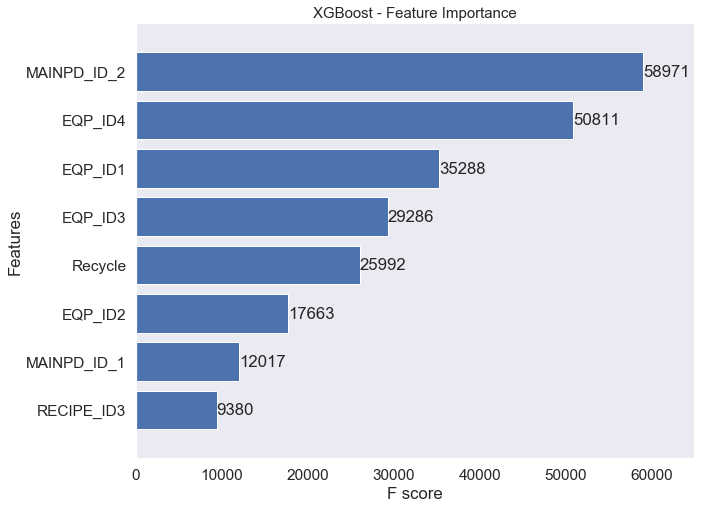

In [18]:
### Feature Importance ###
fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(model_xgb, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("XGBoost - Feature Importance", fontsize=15)
plt.show()

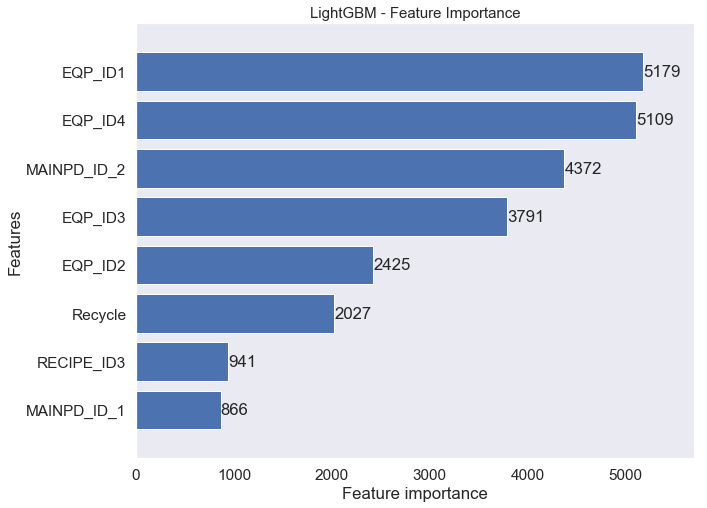

In [19]:
### Feature Importance ###
fig, ax = plt.subplots(figsize=(10,8))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

# 5.1 EQP1 (AXI)
**HIN2/HIN1** is significant worse than other AXI tool. 
**KIN4** is significant good than other AXI tool.

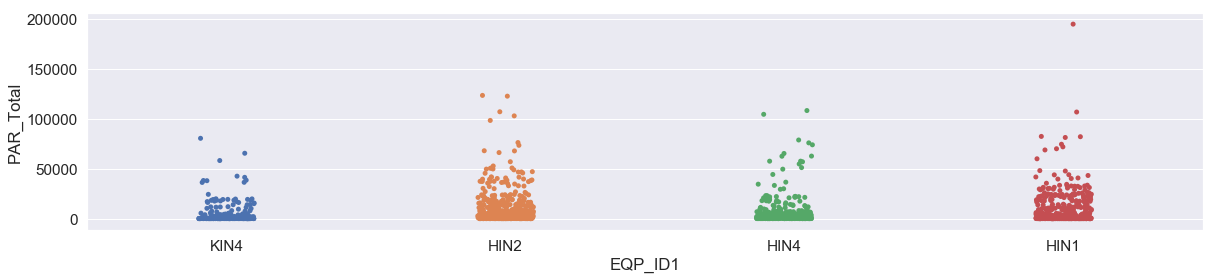

In [20]:
plt.figure(figsize=(20,4))
#df2 = df[df['PAR_Total']<6000]
sns.stripplot(x=df['EQP_ID1'], y=df['PAR_Total'], data=df, jitter=True, edgecolor="gray")

# 5.2 EQP4 (SP)
**JSP22 / KSP17 / KSP27** is significant worse than other SP tool.
**KSP20 / KSP22 / KSP21** is significant good than other SP tool.

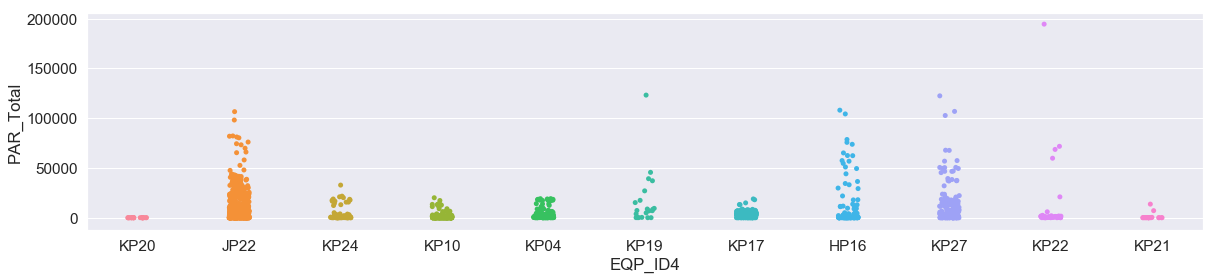

In [21]:
plt.figure(figsize=(20,4))
#df2 = df[df['PAR_Total']<6000]
sns.stripplot(x=df['EQP_ID4'], y=df['PAR_Total'], data=df, jitter=True, edgecolor="gray")

# 5.3 EQP3 (Clean)
**GSP** is significant worse than other Clean tool.
**GSE / JDS1** is significant good than other Clean tool.

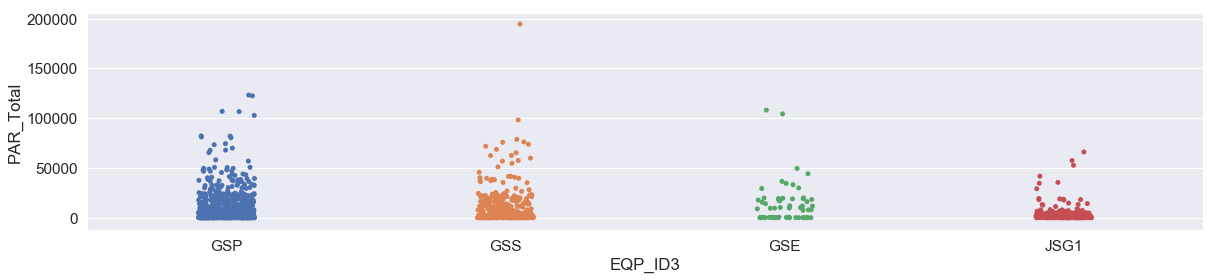

In [22]:
plt.figure(figsize=(20,4))
#df2 = df[df['PAR_Total']<6000]
sns.stripplot(x=df['EQP_ID3'], y=df['PAR_Total'], data=df, jitter=True, edgecolor="gray")

# 5.4 EQP2 (CMP)
**GR5** is significant worse than other CMP tool.
**GR7** is significant good than other CMP tool.

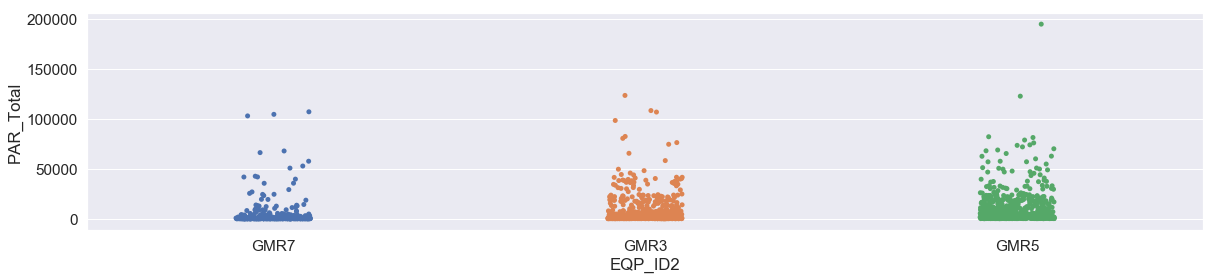

In [23]:
plt.figure(figsize=(20,4))
#df2 = df[df['PAR_Total']<6000]
sns.stripplot(x=df['EQP_ID2'], y=df['PAR_Total'], data=df, jitter=True, edgecolor="gray")

# 5.5 Mainpd_2
**R3** is significant worse than other Route

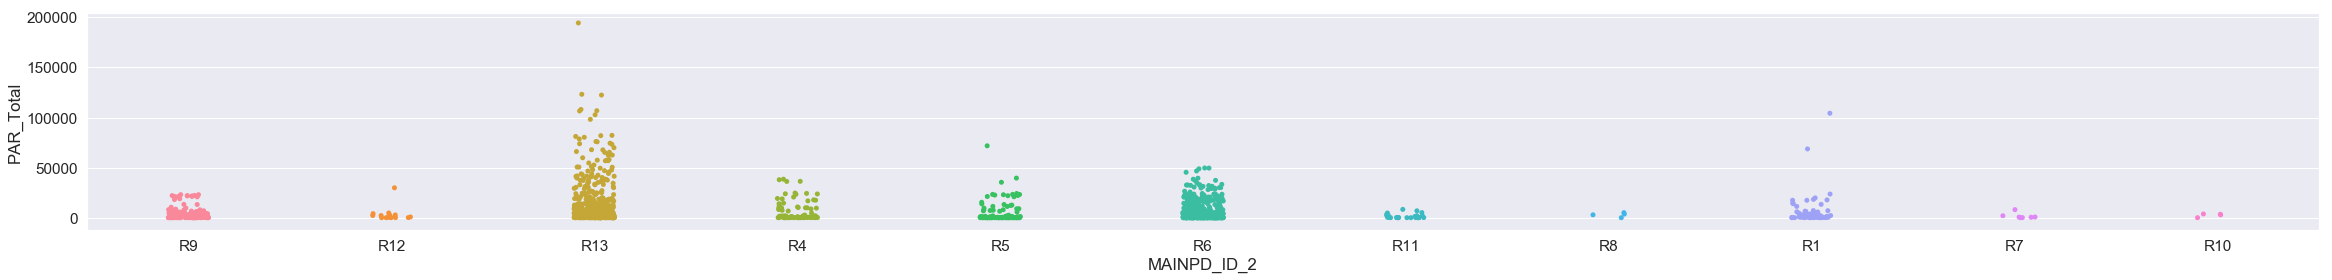

In [24]:
plt.figure(figsize=(40,4))
#df2 = df[df['PAR_Total']<6000]
sns.stripplot(x=df['MAINPD_ID_2'], y=df['PAR_Total'], data=df, jitter=True, edgecolor="gray")

# 5.6 Recycle
The Recycle count < 3 is good than others

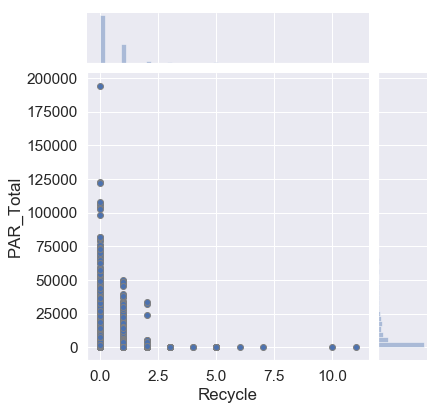

In [25]:
plt.figure(figsize=(20,20))
#df2 = df[df['PAR_Total']<60000]
sns.jointplot(x=df['Recycle'], y=df['PAR_Total'], data=df, edgecolor="gray")

# 5.7 MainPD_ID1
**R2** is significant good than **R1**

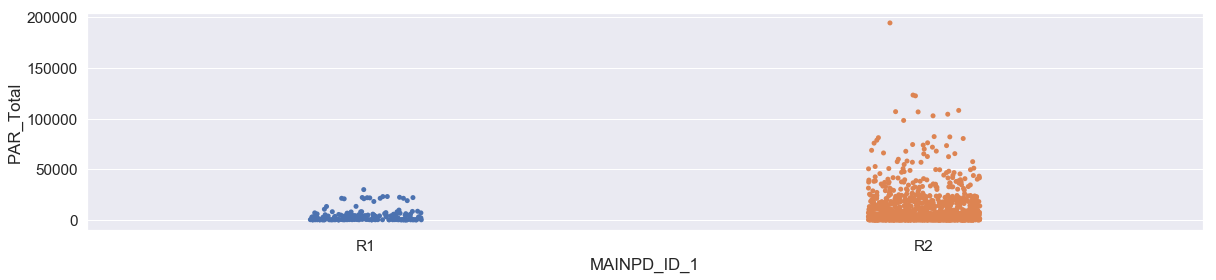

In [26]:
plt.figure(figsize=(20,4))
#df2 = df[df['PAR_Total']<6000]
sns.stripplot(x=df['MAINPD_ID_1'], y=df['PAR_Total'], data=df, jitter=True, edgecolor="gray")